In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('Employee.csv')

In [3]:
df

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


# Data Exploration

In [5]:
df.shape

(148, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [7]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [9]:
df.Company.unique()

array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
       'Congnizant', 'Infosys Pvt Lmt'], dtype=object)

In [10]:
len(df.Company.unique())

7

In [12]:
df.Age.unique()

array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
       21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
       33., 17.,  0., 54.])

In [13]:
len(df.Age.unique())

30

In [15]:
df.Salary.unique()

array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
       1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
       8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
       9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
       3454., 5654., 5009., 5098., 3033.])

In [16]:
len(df.Salary.unique())

41

In [17]:
df.Place.unique()

array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
       nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
      dtype=object)

In [18]:
len(df.Place.unique())

12

In [19]:
df.Country.unique()

array(['India'], dtype=object)

In [20]:
len(df.Country.unique())

1

In [21]:
df.Gender.unique()

array([0, 1], dtype=int64)

In [22]:
len(df.Gender.unique())

2

# Data Cleaning

In [27]:
df.duplicated().sum()

4

In [29]:
Newdf=df.drop_duplicates()

In [30]:
Newdf.shape

(144, 6)

In [31]:
Newdf.Age.value_counts()

Age
22.0    15
33.0    13
44.0    10
23.0     8
34.0     8
32.0     7
21.0     7
35.0     6
0.0      6
41.0     5
45.0     4
24.0     4
20.0     3
31.0     3
43.0     3
25.0     3
36.0     3
40.0     3
26.0     2
30.0     2
46.0     2
50.0     2
37.0     2
19.0     1
38.0     1
51.0     1
18.0     1
17.0     1
54.0     1
Name: count, dtype: int64

In [32]:
# replace the value 0 in age as NaN
Newdf.Age = Newdf.Age.replace(to_replace = 0,value = np.NaN)

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_21420\1160721960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf.Age = Newdf.Age.replace(to_replace = 0,value = np.NaN)


In [33]:
Newdf.Age.max()

54.0

In [34]:
Newdf.Age.min()

17.0

In [35]:
Newdf[Newdf.Age<18]

,Company,Age,Salary,Place,Country,Gender
85,CTS,17.0,1234.0,Calcutta,India,0


In [37]:
#drop row having age < 18
age_index = Newdf[Newdf.Age < 18].index

Newdf.drop(age_index,inplace=True)

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_21420\225124035.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf.drop(age_index,inplace=True)


In [38]:
Newdf.Salary.max()

9876.0

In [39]:
Newdf.Salary.min()

1089.0

In [40]:
# find outliers
Q1 = Newdf.Salary.quantile(0.25)
Q3 = Newdf.Salary.quantile(0.75)
IQR = Q3 - Q1
Q1,Q3,IQR

(3030.0, 8000.0, 4970.0)

In [42]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

lower,upper

(-4425.0, 15455.0)

In [44]:
# Treating null values
Newdf.isnull().sum()

Company     8
Age        23
Salary     23
Place      14
Country     0
Gender      0
dtype: int64

In [45]:
Newdf.Age.fillna(df.Age.mean(),inplace = True)

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_21420\4002428519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf.Age.fillna(df.Age.mean(),inplace = True)


In [46]:
Newdf.Salary.fillna(df.Salary.mean(),inplace = True)

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_21420\3197006759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf.Salary.fillna(df.Salary.mean(),inplace = True)


In [47]:
Newdf.Company.fillna(method = 'bfill',inplace = True)

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_21420\1213532714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf.Company.fillna(method = 'bfill',inplace = True)


In [48]:
Newdf.Place.fillna(method = 'bfill',inplace = True)

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_21420\3821710392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf.Place.fillna(method = 'bfill',inplace = True)


In [49]:
Newdf.isnull().sum()

Company    0
Age        0
Salary     0
Place      0
Country    0
Gender     0
dtype: int64

# Data Analysis


In [50]:
# Filter the data with age >40 and salary <5000
Newdf[(Newdf.Age > 40) & (Newdf.Salary < 5000)]

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


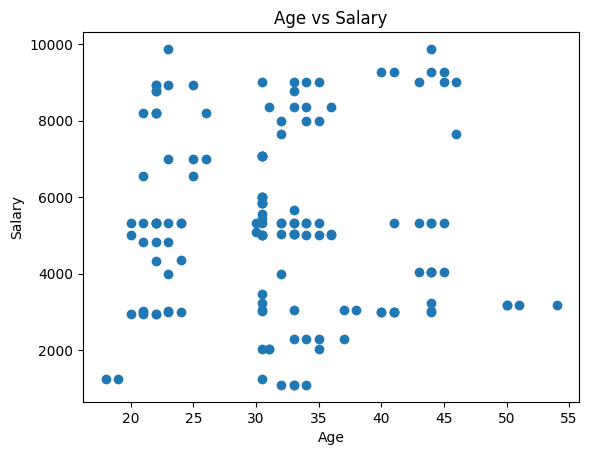

In [52]:
# plot the chart with age and salary.
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.scatter (Newdf.Age,Newdf.Salary)

In [53]:
# count the number of people from each place and represent it visually

Newdf.Place.value_counts()

Place
Mumbai        34
Calcutta      31
Noida         22
Chennai       14
Delhi         14
Cochin        13
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

<Axes: xlabel='Place', ylabel='Number of people'>

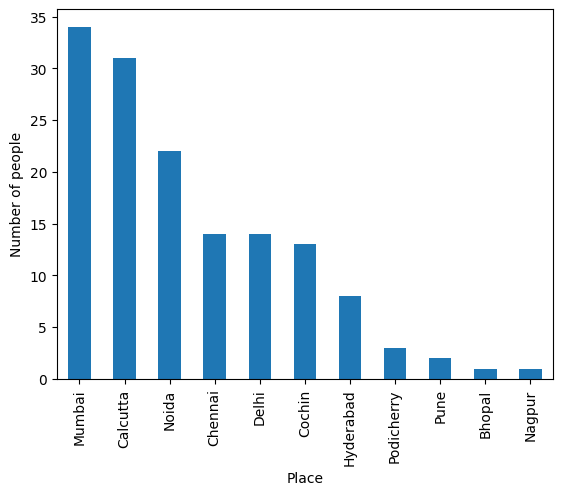

In [57]:
plt.xlabel('Place')
plt.ylabel('Number of people')
Newdf.Place.value_counts().plot(kind = 'bar')

# Data Encoding

In [69]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [70]:
# one-hot encoding

categorical_columns = ['Company','Place','Country','Gender']
encoded_data = pd.get_dummies(Newdf,columns = categorical_columns)
encoded_data


,Age,Salary,Company_CTS,Company_Congnizant,Company_Infosys,Company_Infosys Pvt Lmt,Company_TCS,Company_Tata Consultancy Services,Place_Bhopal,Place_Calcutta,...,Place_Delhi,Place_Hyderabad,Place_Mumbai,Place_Nagpur,Place_Noida,Place_Podicherry,Place_Pune,Country_India,Gender_0,Gender_1
0,20.0,5312.467742,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,30.0,5312.467742,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
2,35.0,2300.000000,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,True,False
3,40.0,3000.000000,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,True,False
4,23.0,4000.000000,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,22.0,8202.000000,False,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
143,33.0,9024.000000,False,False,False,False,True,False,False,True,...,False,False,False,False,False,False,False,True,False,True
145,44.0,4034.000000,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,True
146,33.0,5034.000000,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,True


In [71]:
# Label encoding

label_encoder = LabelEncoder()
Newdf['Company_Encoded'] = label_encoder.fit_transform(Newdf['Company'])
Newdf.head()

C:\Users\RAMSEENA\AppData\Local\Temp\ipykernel_21420\2917256130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Newdf['Company_Encoded'] = label_encoder.fit_transform(Newdf['Company'])


,Company,Age,Salary,Place,Country,Gender,Company_Encoded
0,TCS,20.0,5312.467742,Chennai,India,0,4
1,Infosys,30.0,5312.467742,Mumbai,India,0,2
2,TCS,35.0,2300.000000,Calcutta,India,0,4
3,Infosys,40.0,3000.000000,Delhi,India,0,2
4,TCS,23.0,4000.000000,Mumbai,India,0,4


# Feature Scaling

In [76]:
# StandardScaler

num_columns = ['Age','Salary']
scaler1 = StandardScaler()
scaled1 = scaler1.fit_transform(encoded_data[num_columns])
scaled1

array([[-1.45774133e+00, -1.70026896e-03],
       [-2.32349792e-01, -1.70026896e-03],
       [ 3.80345977e-01, -1.28698556e+00],
       [ 9.93041747e-01, -9.88326856e-01],
       [-1.09012387e+00, -5.61671570e-01],
       [-1.72965433e-01, -1.35016283e-01],
       [-1.72965433e-01,  2.91639004e-01],
       [-1.09012387e+00,  7.18294290e-01],
       [ 2.57806823e-01,  1.14494958e+00],
       [ 1.60573752e+00,  1.57160486e+00],
       [-1.09012387e+00, -1.70026896e-03],
       [ 2.57806823e-01, -1.80366511e+00],
       [ 1.60573752e+00, -1.70026896e-03],
       [-1.70281964e+00, -1.74180009e+00],
       [ 9.93041747e-01, -9.88326856e-01],
       [-1.09012387e+00, -9.88326856e-01],
       [-1.09012387e+00, -9.75527198e-01],
       [ 2.57806823e-01, -1.35016283e-01],
       [-1.21266302e+00, -1.70026896e-03],
       [ 1.27285157e-02, -1.70026896e-03],
       [ 6.25424285e-01, -9.69127368e-01],
       [ 2.21843329e+00, -9.09822283e-01],
       [-1.33520218e+00, -2.10107613e-01],
       [-1.

In [78]:
# MinMaxScaler

scaler2 = MinMaxScaler()
scaled2 = scaler2.fit_transform(encoded_data[num_columns])
scaled2

array([[0.05555556, 0.48064957],
       [0.33333333, 0.48064957],
       [0.47222222, 0.13781723],
       [0.61111111, 0.21748037],
       [0.13888889, 0.33128485],
       [0.34679487, 0.44508934],
       [0.34679487, 0.55889382],
       [0.13888889, 0.6726983 ],
       [0.44444444, 0.78650279],
       [0.75      , 0.90030727],
       [0.13888889, 0.48064957],
       [0.44444444, 0.        ],
       [0.75      , 0.48064957],
       [0.        , 0.01650165],
       [0.61111111, 0.21748037],
       [0.13888889, 0.21748037],
       [0.13888889, 0.2208945 ],
       [0.44444444, 0.44508934],
       [0.11111111, 0.48064957],
       [0.38888889, 0.48064957],
       [0.52777778, 0.22260157],
       [0.88888889, 0.23842039],
       [0.08333333, 0.42505975],
       [0.34679487, 0.54011608],
       [0.34679487, 0.68225788],
       [0.13888889, 0.89382042],
       [0.44444444, 0.82576534],
       [0.75      , 0.93262775],
       [0.13888889, 1.        ],
       [0.47222222, 0.10754524],
       [0.